# Hurst Exponent for trends confirmation

#### What is the Hurst Exponent?
The Hurst Exponent is a statistical measure that can be used to quantify the degree of persistence of a time series. If a time series has long-term memory, it means that past events will likely impact future events.

In other words, the Hurst Exponent can tell you if a trend is present, how strong it is, and if it is likely to continue.

The higher the H value, the stronger the trend.

The function of a regime filter is to act like a traffic cop on a one-lane bridge. If the conditions are not right, you cannot cross the bridge.

When the Hurst Exponent (H) is more than 0.50 that means that the ticker is trending. Positive returns tend to be followed by positive returns and vice versa.

I have seen some explanations for H that say when the value of H is > 0.50 that means that the ticker is trending bullish, and when the value of H is < 0.50 that means the ticker is trending bearish. THIS IS WRONG.

H > 0.50 means the ticker is trending. Period. There is no directional information in the signal.

The Hurst exponent is a statistical measure that can be used to quantify the long-term memory or persistence of a time series. A time series is a series of data points collected over a period of time, and the Hurst exponent can be used to determine whether the series exhibits trends or patterns that persist over time.It is named after Harold Edwin Hurst, who developed the concept in the 1950s as a way to analyze the flow of the Nile river.The Hurst exponent is a statistical measure that can be used to characterize the long-term memory of a time series. It is commonly used in the field of quantitative finance to analyze the behavior of financial markets and make predictions about future trends.

The Hurst exponent is calculated using a method called rescaled range analysis. The basic idea behind rescaled range analysis is to calculate the range of the cumulative sum of a time series, and compare it to the standard deviation of the series.

For example, consider a time series of daily stock prices for a particular company. If the Hurst exponent for this time series is high, it suggests that the stock price is likely to continue in the same direction (either increasing or decreasing) for a longer period of time. On the other hand, if the Hurst exponent is low, it suggests that the stock price is more likely to fluctuate randomly and may not exhibit any long-term trends.

The Hurst exponent can be calculated using a variety of techniques, including the rescaled range analysis method developed by Hurst himself. Once the Hurst exponent has been calculated, it can be used to make predictions about the future behavior of the time series. For example, in the case of stock prices, a high Hurst exponent may be used to suggest that the stock is likely to continue to increase (or decrease) in the future, while a low Hurst exponent may be used to suggest that the stock is likely to fluctuate randomly.The Hurst exponent is typically denoted by the letter H and can take on values between 0 and 1. A value of H greater than 0.5 indicates that the time series exhibits long-term trends, while a value of H less than or equal to 0.5 indicates that the time series fluctuates randomly.

One way to calculate the Hurst exponent is through the rescaled range analysis method. This method involves calculating the cumulative sum of the time series, denoted by S(t), and the range of the cumulative sum, denoted by R(n). The Hurst exponent can then be calculated as follows:

H = R(n) / S(n)

where n is the length of the time series.

#### Hurst Exponent in Simple Words:

The Hurst Exponent is like a detective tool for time series data. It helps us understand the nature of the data - whether it behaves randomly, tends to come back to an average, or likes to keep going in the same direction.

Interpretation with Examples:

##### H = 0.5 (Random Walk):
    - Example: Imagine you're flipping a fair coin.
    - Interpretation: The process is unpredictable, like the randomness of coin flips.
    - If the Hurst Exponent is close to 0.5, it suggests that the stock prices are unpredictable, much like the randomness of a coin flip. There's no clear trend, and it's challenging to forecast the next price movement.
 


##### H < 0.5 (Mean-Reverting):
    - Example: Think of a yo-yo going up and down but always returning to your hand.
    - Interpretation: The data tends to oscillate around an average, just like the yo-yo that keeps coming back to its starting point.
    -  If the Hurst Exponent is less than 0.5, it implies that the stock prices show a tendency to revert to an average. For instance, if the stock price rises significantly, there's a higher chance it will fall back to its average level, and vice versa.
 
  

##### H > 0.5 (Trending):
    - Example: Picture a ball rolling down a hill and continuing in the same direction.
    - Interpretation: The data has a tendency to keep going in its current direction, like the ball rolling down the hill without turning back.
    - When the Hurst Exponent is greater than 0.5, it suggests that the stock prices have a tendency to continue in their current direction. If the stock price is rising, there's a likelihood that it will keep going up, and if it's falling, it's likely to continue on a downward trajectory.


#### Basic of the Hurst Exponent
The Hurst Exponent, denoted as H, is a statistical measure that gives us a window into the behavior of time series data. Whether it’s the price of a stock, the flow rate of a river, or even internet traffic, H seeks to determine the nature of its behavior. Put simply, the interpretation of the Hurst Exponent is as follows

- If H=0.5, the process is akin to a random walk, like the flipping of a coin.
- If H<0.5, it suggests a series that tends to mean-revert. In the context of stocks, this might hint at an oscillatory behavior where if the stock price rises, it’s likely to fall back to its mean and vice-versa.
- If H>0.5, it indicates a trending series. This would mean that if a stock price rises, it’s likely to continue on that upward trajectory.


***One way to calculate the Hurst exponent is through the rescaled range analysis method. This method involves calculating the cumulative sum of the time series, denoted by S(t), and the range of the cumulative sum, denoted by R(n). The Hurst exponent can then be calculated as follows:**

H = R(n) / S(n)

where n is the length of the time series.



In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
def calculate_hurst_exponent(stock_ticker):
    # Get the stock data from Yahoo Finance
    stock = yf.Ticker(stock_ticker)
    data = stock.history(period="max")
    # Extract the closing prices
    close_prices = data["Close"].values
# Calculate the log returns of the closing prices
    log_returns = np.log(close_prices[1:] / close_prices[:-1])
# Initialize the range of scales to consider
    scales = range(10, len(log_returns) + 1, 10)
# Initialize an empty list to store the Hurst exponents
    hurst_exponents = []
    # Calculate the Hurst exponent for each scale
    for scale in scales:
        # Calculate the cumulative sum of the log returns
        cumulative_sum = np.cumsum(log_returns[:scale])

        # Calculate the range of the cumulative sum
        R = np.max(cumulative_sum) - np.min(cumulative_sum)

        # Calculate the standard deviation of the log returns
        std = np.std(log_returns[:scale])

        # Calculate the Hurst exponent for this scale
        H = R / (std * scale ** 0.5)

        # Add the Hurst exponent to the list
        hurst_exponents.append(H)
    # Calculate the mean Hurst exponent over all scales
    hurst_exponent = np.mean(hurst_exponents)

    return hurst_exponent

In [6]:
# Calculate the Hurst exponents for two stocks
stock_1_hurst_exponent = calculate_hurst_exponent("MRPL.NS")
stock_2_hurst_exponent = calculate_hurst_exponent("KALYANKJIL.NS")

print("Stock 1 Hurst Exponent:", stock_1_hurst_exponent)
print("Stock 2 Hurst Exponent:", stock_2_hurst_exponent)

Stock 1 Hurst Exponent: 1.48421615220889
Stock 2 Hurst Exponent: 1.5503570435359153


Stock 2 is more likely to exhibit long-term trends than Stock 1.


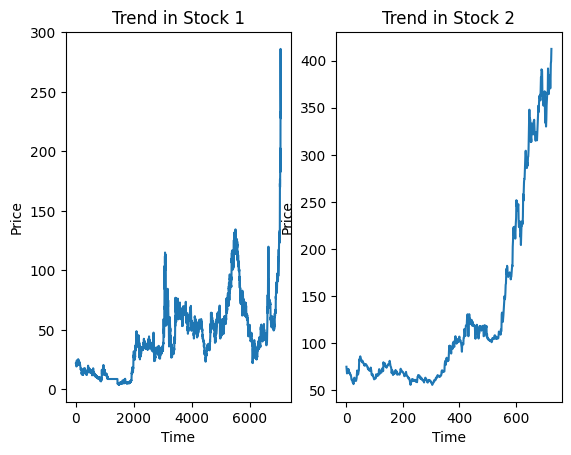

In [8]:
# Check if both Hurst exponents are not None before comparison
if stock_1_hurst_exponent is not None and stock_2_hurst_exponent is not None:
    # Compare the Hurst exponents of the two stocks
    if stock_1_hurst_exponent > stock_2_hurst_exponent:
        print("Stock 1 is more likely to exhibit long-term trends than Stock 2.")
    elif stock_1_hurst_exponent < stock_2_hurst_exponent:
        print("Stock 2 is more likely to exhibit long-term trends than Stock 1.")
    else:
        print("Stock 1 and Stock 2 are equally likely to exhibit long-term trends.")
else:
    print("One or both of the Hurst exponents is None. Cannot compare.")


# Plot the trends of the two stocks side by side
fig, ax = plt.subplots(1, 2)

# Plot the trend for Stock 1
ax[0].plot(yf.Ticker("MRPL.NS").history(period="max")["Close"].values)
ax[0].set_title("Trend in Stock 1")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Price")

# Plot the trend for Stock 2
ax[1].plot(yf.Ticker("KALYANKJIL.NS").history(period="max")["Close"].values)
ax[1].set_title("Trend in Stock 2")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Price")

plt.show()

The Hurst Exponent, denoted as H, is a statistical measure that gives us a window into the behavior of time series data. Whether it’s the price of a stock, the flow rate of a river, or even internet traffic, H seeks to determine the nature of its behavior.

## The Rolling Hurst Exponent:

Traditionally, the Hurst exponent offers a snapshot, a point-in-time insight. But markets are dynamic, evolving with news, policies, and global events. Thus, a rolling computation, where the Hurst exponent is continually recalculated over a moving window, offers fresher, more timely insights. It’s akin to watching a movie frame-by-frame, where each frame offers a unique perspective.

S(t) / R(t) = H


- R(t) is the range of cumulative sum deviations. The broad idea behind R(t) is to determine how volatile a time series is
- S(t) is the standard deviation of the series. It represents the standard deviation of the series, capturing its average dispersion from the mean.

##### The Link with Fractal Dimension:
The fractal dimension is another fascinating concept, rooted in the idea of measuring the ‘roughness’ or complexity of a series. It’s intrinsically tied to the Hurst exponent and can be determined as:

D = 2 - H

Where D is the fractal dimension. A higher D indicates a more complex, irregular series, whereas a value close to 1 suggests a smoother series.

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

symbol = "DEEPAKFERT.NS"
start_date = "2022-01-01"
end_date = "2024-02-29"
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [8]:
def hurst_fd(price_series, min_window=10, max_window=100, num_windows=20, num_samples=100):
    log_returns = np.diff(np.log(price_series))
    window_sizes = np.linspace(min_window, max_window, num_windows, dtype=int)
    R_S = []

    for w in window_sizes:
        R, S = [], []
        for _ in range(num_samples):
            start = np.random.randint(0, len(log_returns) - w)
            seq = log_returns[start:start + w]
            R.append(np.max(seq) - np.min(seq))
            S.append(np.std(seq))

        R_S.append(np.mean(R) / np.mean(S))

    log_window_sizes = np.log(window_sizes)
    log_R_S = np.log(R_S)
    coeffs = np.polyfit(log_window_sizes, log_R_S, 1)
    hurst_exponent = coeffs[0]
    fractal_dimension = 2 - hurst_exponent

    return hurst_exponent, fractal_dimension

def rolling_hurst(price_series, window, min_window=10, max_window=100, num_windows=20, num_samples=100):
    return price_series.rolling(window=window).apply(lambda x: hurst_fd(x, min_window, max_window, num_windows, num_samples)[0], raw=True)

def rolling_fractal_dimension(price_series, window, min_window=10, max_window=100, num_windows=20, num_samples=100):
    return price_series.rolling(window=window).apply(lambda x: hurst_fd(x, min_window, max_window, num_windows, num_samples)[1], raw=True)

In [9]:
# Essential Libraries Import
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to calculate Hurst Exponent and Fractal Dimension
def hurst_fd(price_series, min_window=10, max_window=100, num_windows=20, num_samples=100):
    # Calculate logarithmic returns
    log_returns = np.diff(np.log(price_series))
    
    # Define window sizes for the resampling approach
    window_sizes = np.linspace(min_window, max_window, num_windows, dtype=int)
    R_S = []

    # For each window size, calculate R/S values
    for w in window_sizes:
        R, S = [], []
        
        # Resample multiple sequences for a more robust estimate
        for _ in range(num_samples):
            start = np.random.randint(0, len(log_returns) - w)
            seq = log_returns[start:start + w]
            R.append(np.max(seq) - np.min(seq))
            S.append(np.std(seq))

        R_S.append(np.mean(R) / np.mean(S))

    # Calculate the slope (Hurst Exponent) in a log-log plot
    log_window_sizes = np.log(window_sizes)
    log_R_S = np.log(R_S)
    coeffs = np.polyfit(log_window_sizes, log_R_S, 1)

    # Extract Hurst Exponent and derive Fractal Dimension
    hurst_exponent = coeffs[0]
    fractal_dimension = 2 - hurst_exponent

    return hurst_exponent, fractal_dimension

# Function to calculate rolling Hurst Exponent
def rolling_hurst(price_series, window, min_window=10, max_window=100, num_windows=20, num_samples=100):
    return price_series.rolling(window=window).apply(lambda x: hurst_fd(x, min_window, max_window, num_windows, num_samples)[0], raw=True)

# Function to calculate rolling Fractal Dimension
def rolling_fractal_dimension(price_series, window, min_window=10, max_window=100, num_windows=20, num_samples=100):
    return price_series.rolling(window=window).apply(lambda x: hurst_fd(x, min_window, max_window, num_windows, num_samples)[1], raw=True)

# Define symbol and fetch its historical data
symbol = "MRPL.NS"
start_date = "2023-01-01"
end_date = "2024-02-29"
df = yf.download(symbol, start=start_date, end=end_date)

# Calculate rolling Hurst Exponent and Fractal Dimension for the stock data
rolling_window = 120
df['hurst_exponent'] = rolling_hurst(df['Close'], rolling_window)
df['fractal_dimension'] = rolling_fractal_dimension(df['Close'], rolling_window)
df.dropna(inplace=True)

# Calculate 30-day Simple Moving Average for visualization purposes
sma_window = 30
df['sma'] = df['Close'].rolling(window=sma_window).mean()

# Calculate mean price for visualization purposes
mean_price = df['Close'].mean()


[*********************100%%**********************]  1 of 1 completed


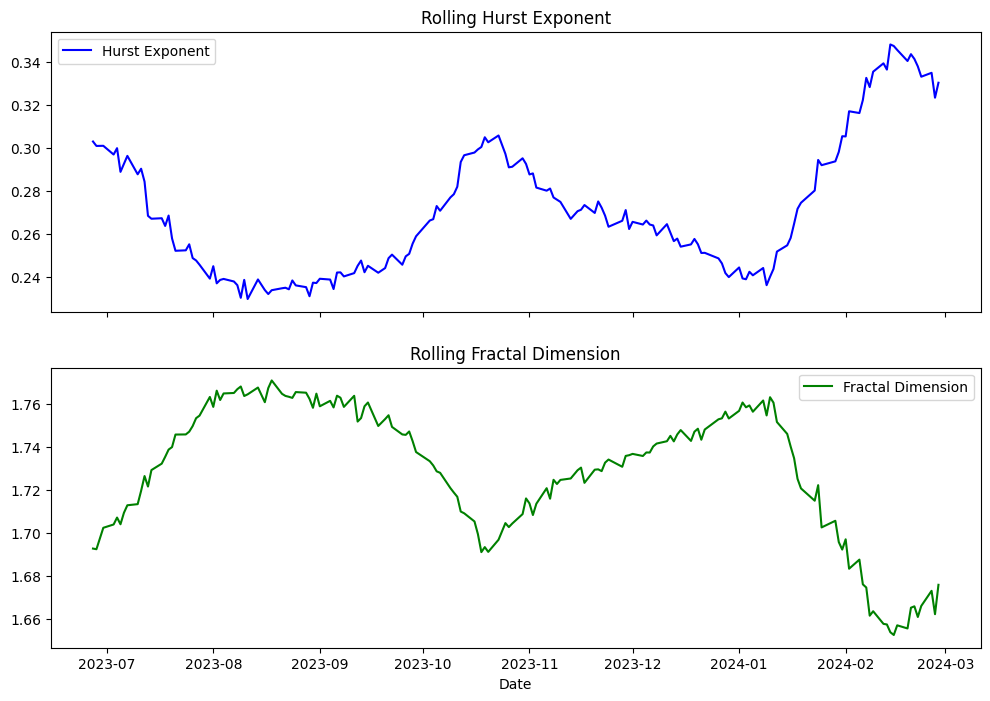

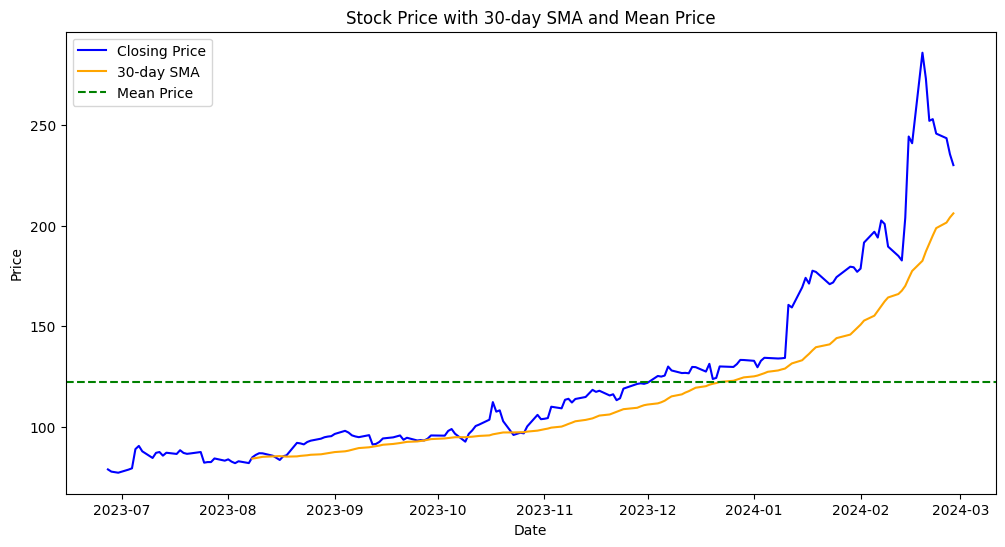

In [10]:
import matplotlib.pyplot as plt

# Plotting the Hurst Exponent and Fractal Dimension
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(df['hurst_exponent'], label='Hurst Exponent', color='blue')
ax1.set_title('Rolling Hurst Exponent')
ax1.legend()

ax2.plot(df['fractal_dimension'], label='Fractal Dimension', color='green')
ax2.set_title('Rolling Fractal Dimension')
ax2.set_xlabel('Date')
ax2.legend()

# Plotting the Closing Prices with 30-day SMA and Mean Price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.plot(df['sma'], label='30-day SMA', color='orange')
plt.axhline(y=mean_price, linestyle='--', label='Mean Price', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 30-day SMA and Mean Price')
plt.legend()

plt.show()


#### Understanding the Results:
Visualizing the stock price alongside its rolling Hurst Exponent and Fractal Dimension provides valuable insights:

- Rolling Hurst Exponent: A value close to 0.5 suggests a random walk (Brownian motion). Values below 0.5 indicate a series that tends to mean revert, while those above 0.5 signify a trending series.
- Rolling Fractal Dimension: A lower value suggests the series is more straightforward or “smooth”, while higher values point to increased complexity or “roughness”.

#### Trading Strategy (Optional):
Based on insights drawn from the Hurst exponent and fractal dimension, devise trading signals. For instance:

- Buy when the Hurst exponent crosses above 0.5, indicating a trending behavior, i.e. the current stock price will persist.
- Sell/short when the Hurst exponent drops below 0.5, hinting at potential mean-reversion.

###### Trend Detection and Strength
- Trending Markets: If the rolling Hurst Exponent consistently stays above 0.5 for a prolonged period, it may indicate a strong trending market. This can be a cue for trend-following strategies, where traders may consider entering long in an upward trend or short in a downward one.
- Mean-Reverting Markets: A Hurst Exponent value consistently below 0.5 signifies potential mean-reverting behavior. In these scenarios, pairs trading or statistical arbitrage strategies can be explored.

##### Volatility Analysis
- The Fractal Dimension can serve as an indicator of market volatility. A higher fractal dimension suggests a more complex and volatile market, potentially calling for caution or different risk management techniques.

##### Portfolio Diversification
- Assessing the Hurst Exponent of various assets can aid in portfolio construction. For instance, combining assets that exhibit different behaviors (trending vs. mean-reverting) can help in achieving better portfolio diversification.

##### Risk Management
- Recognizing phases when the market is transitioning from a trending to a mean-reverting state (or vice-versa) can be invaluable for adjusting risk levels. This could involve reducing position sizes or tightening stop losses.

                                                                                                                               
##### Limitations and Considerations
While the Hurst Exponent and Fractal Dimension provide valuable insights, they aren’t without limitations:

- Lagging Indicators: Like many technical tools, they tend to be lagging indicators. By the time a strong trend is identified, it may be nearing its end.
- Signal Noise: Short-term fluctuations can introduce noise into the metrics, leading to potential misinterpretations.
- Market Anomalies: Unprecedented events or black swan incidents can drastically change the behavior of financial time series, making prior analyses less relevant.

Ref:
- https://medium.com/@crisvelasquez/quantifying-stock-trends-the-rolling-hurst-exponent-in-python-d7108fc0e837
- https://medium.com/@akjha22/uncovering-the-value-of-the-hurst-exponent-in-quantitative-finance-a-practical-guide-aaf3c0ae2292
- https://github.com/diyanr/FE690_Capstone/blob/master/MScFE_690_Capstone_Project_Develop_Diyan.ipynb
- https://github.com/diyanr/FE690_Capstone/blob/master/MScFE_690_Capstone_Project_Implement_Diyan.ipynb
- https://readmedium.com/en/https:/medium.com/@jpolec_72972/the-rolling-hurst-exponent-in-python-19b7b908e251
- https://tng-daryl.medium.com/quantifying-recurrence-via-the-hurst-exponent-a59f3a62200b

## Rolling Hurst Exponent -02

[*********************100%%**********************]  1 of 1 completed


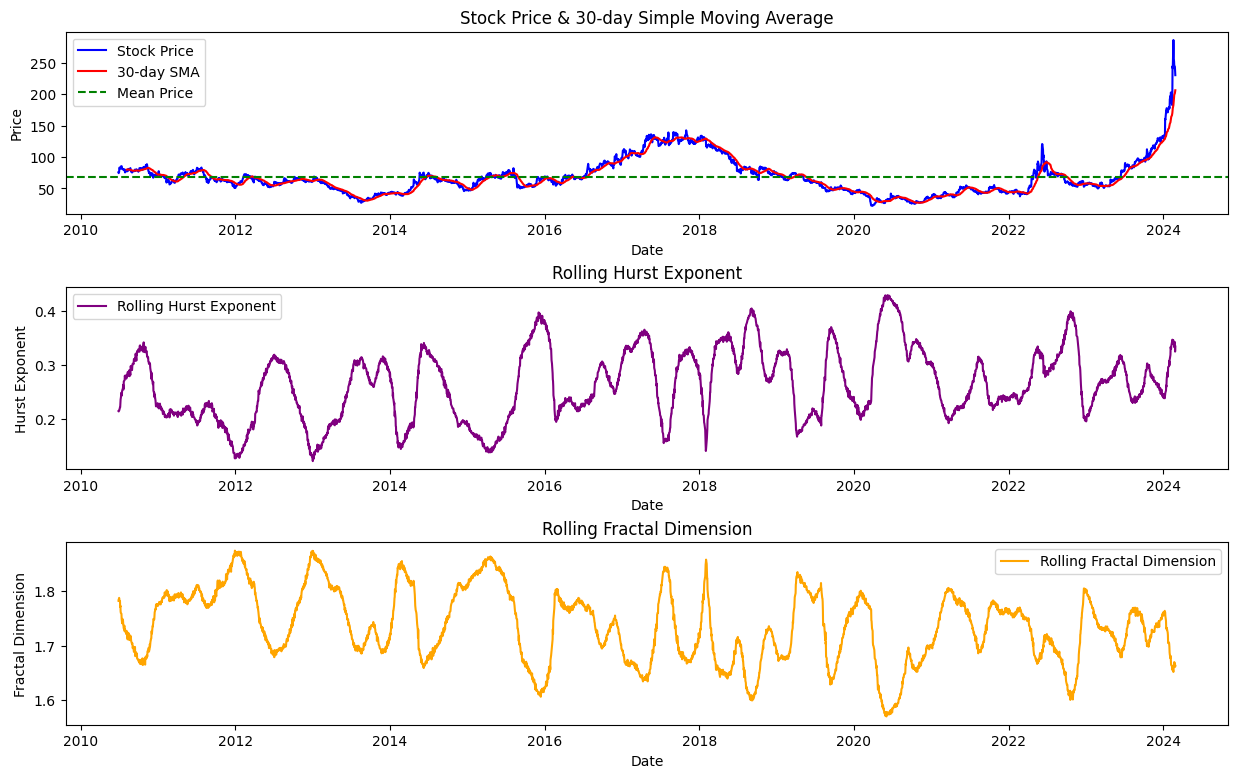

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def hurst_fd(price_series, min_window=10, max_window=100, num_windows=20, num_samples=100):
    """
    Calculates the Hurst Exponent and Fractal Dimension of a time series.
    """

    log_returns = np.diff(np.log(price_series))
    
    # Define window sizes for the resampling approach
    window_sizes = np.linspace(min_window, max_window, num_windows, dtype=int)
    R_S = []

    # For each window size, calculate R/S values
    for w in window_sizes:
        R, S = [], []
        
        # Resample multiple sequences for a more robust estimate
        for _ in range(num_samples):
            start = np.random.randint(0, len(log_returns) - w)
            seq = log_returns[start:start + w]
            R.append(np.max(seq) - np.min(seq))
            S.append(np.std(seq))

        R_S.append(np.mean(R) / np.mean(S))

    # Calculate the slope (Hurst Exponent) in a log-log plot
    log_window_sizes = np.log(window_sizes)
    log_R_S = np.log(R_S)
    coeffs = np.polyfit(log_window_sizes, log_R_S, 1)

    # Extract Hurst Exponent and derive Fractal Dimension
    hurst_exponent = coeffs[0]
    fractal_dimension = 2 - hurst_exponent

    return hurst_exponent, fractal_dimension

def rolling_hurst(price_series, window, min_window=10, max_window=100, num_windows=20, num_samples=100):
    """
    Calculates the rolling Hurst Exponent of a time series.
    """
    return price_series.rolling(window=window).apply(lambda x: hurst_fd(x, min_window, max_window, num_windows, num_samples)[0], raw=True)

def rolling_fractal_dimension(price_series, window, min_window=10, max_window=100, num_windows=20, num_samples=100):
    """
    Calculates the rolling Fractal Dimension of a time series.
    """
    return price_series.rolling(window=window).apply(lambda x: hurst_fd(x, min_window, max_window, num_windows, num_samples)[1], raw=True)

symbol = "MRPL.NS"
start_date = "2010-01-01"
end_date = "2024-02-29"
df = yf.download(symbol, start=start_date, end=end_date)

# Calculate rolling Hurst Exponent and Fractal Dimension for the stock data
rolling_window = 120
df['hurst_exponent'] = rolling_hurst(df['Close'], rolling_window)
df['fractal_dimension'] = rolling_fractal_dimension(df['Close'], rolling_window)
df.dropna(inplace=True)

# Calculate 30-day Simple Moving Average for visualization purposes
sma_window = 30
df['sma'] = df['Close'].rolling(window=sma_window).mean()

# Calculate mean price for visualization purposes
mean_price = df['Close'].mean()


# Plot settings
plt.figure(figsize=(15, 9))
plt.subplots_adjust(hspace=0.4)

# 1. Stock Price & SMA
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Stock Price', color='blue')
plt.plot(df['sma'], label=f'{sma_window}-day SMA', color='red')
plt.axhline(y=mean_price, color='green', linestyle='--', label='Mean Price')
plt.title(f'Stock Price & {sma_window}-day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 2. Rolling Hurst Exponent
plt.subplot(3, 1, 2)
plt.plot(df['hurst_exponent'], label='Rolling Hurst Exponent', color='purple')
plt.title('Rolling Hurst Exponent')
plt.xlabel('Date')
plt.ylabel('Hurst Exponent')
plt.legend()

# 3. Rolling Fractal Dimension
plt.subplot(3, 1, 3)
plt.plot(df['fractal_dimension'], label='Rolling Fractal Dimension', color='orange')
plt.title('Rolling Fractal Dimension')
plt.xlabel('Date')
plt.ylabel('Fractal Dimension')
plt.legend()

# Display the plots
plt.show()

## Implementation - 03

https://raposa.trade/blog/find-your-best-market-to-trade-with-the-hurst-exponent/

## What is the Hurst Exponent?
The Hurst exponent can be used to determine whether a time series is tends to move in a single direction (H>0.5), oscillates (H<0.5), or is random (H=0.5).

While Hurst found this relationship to be useful in various natural phenomena such as floods, river discharges, and tree rings, we can also use it to categorize a market as trending or mean reverting. If we know that a market tends to behave in one way or the other, we can try to capture that with appropriate mean reversion or trend following strategies or use it as a filter in your algorithmic trading system.



Say we have a price series we call x. Then we can look at the difference between x at different times t and take the difference. The time difference is going to be called or the lag. We want to get the relationship of the standard deviation of the differences across these lags.

We can write our calculation in the following steps:

1. Choose a range of lags (e.g. 2 to 100).
2. Calculate the lagged difference between all the points in x.
3. Calculate the standard deviation for each lag.
4. Plot the log of the standard deviation against the log of the lags to estimate H.


$$
D
τ
=
x
t
+
τ
−
x
t
∀
τ
$$

$$
σ
τ
=
√
1
N
∑
(
D
τ
−
¯
D
τ
)
2
∀
τ
σ
$$

$$
τ
=
τ
H
∀
τ
$$


$$
log
(
σ
τ
)
=
H
log
(
τ
)
$$

In [2]:
!pip install matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def hurst(price, min_lag=2, max_lag=100):
  lags = np.arange(min_lag, max_lag + 1)
  tau = [np.std(np.subtract(price[lag:], price[:-lag])) 
    for lag in lags]
  m = np.polyfit(np.log10(lags), np.log10(tau), 1)
  return m, lags, tau

In [6]:
N = 10000
rand = np.cumsum(np.random.randn(N) + 0.01)
mr = np.cumsum(np.sin(np.linspace(0, N/3*np.pi, N))/2 + 1)
tr = np.cumsum(np.arange(N)/N)

m_rand, lag_rand, rs_rand = hurst(rand)
m_mr, lag_mr, rs_mr = hurst(mr)
m_tr, lag_tr, rs_tr = hurst(tr)

print(f"Hurst(Random):\t{m_rand[0]:.3f}")
print(f"Hurst(MR):\t{m_mr[0]:.3f}")
print(f"Hurst(TR):\t{m_tr[0]:.3f}")

Hurst(Random):	0.509
Hurst(MR):	0.075
Hurst(TR):	0.997


In [7]:
import pandas as pd
import yfinance as yf

tickers = ['CHF=X', 'BTC-USD', 'SPY', 'GLD', 'USO','^NSEI','HDFCBANK.NS']
start = '2010-01-01'
end = '2021-12-31'
yfObj = yf.Tickers(tickers)
df = yfObj.history(start=start, end=end)
df.drop(['Stock Splits', 'Dividends', 'Volume', 
         'Open', 'High', 'Low'], axis=1, inplace=True)
df.columns = df.columns.swaplevel()

[*********************100%%**********************]  7 of 7 completed


In [8]:
vals = {c[0]: hurst(df[c].dropna().values) for c in df.columns}


/tmp/ipykernel_38600/3134696404.py:5: RuntimeWarning: divide by zero encountered in log10
  m = np.polyfit(np.log10(lags), np.log10(tau), 1)


/tmp/ipykernel_38600/2979358379.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[0].scatter(np.log10(x), np.log10(y), c=colors[1])  # Use colors[1] or choose the appropriate color index


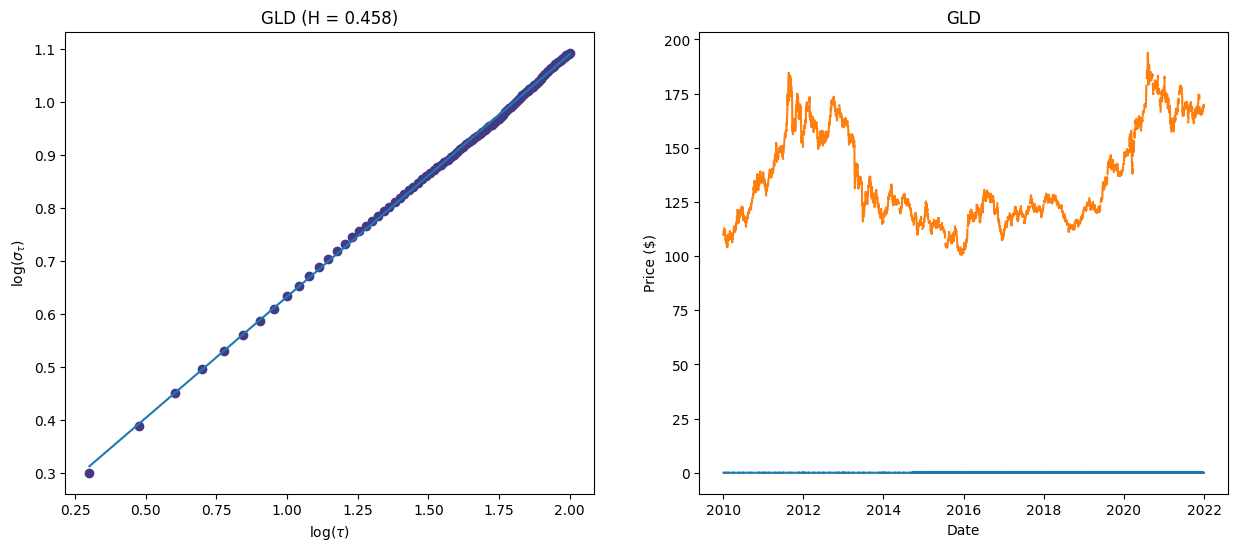

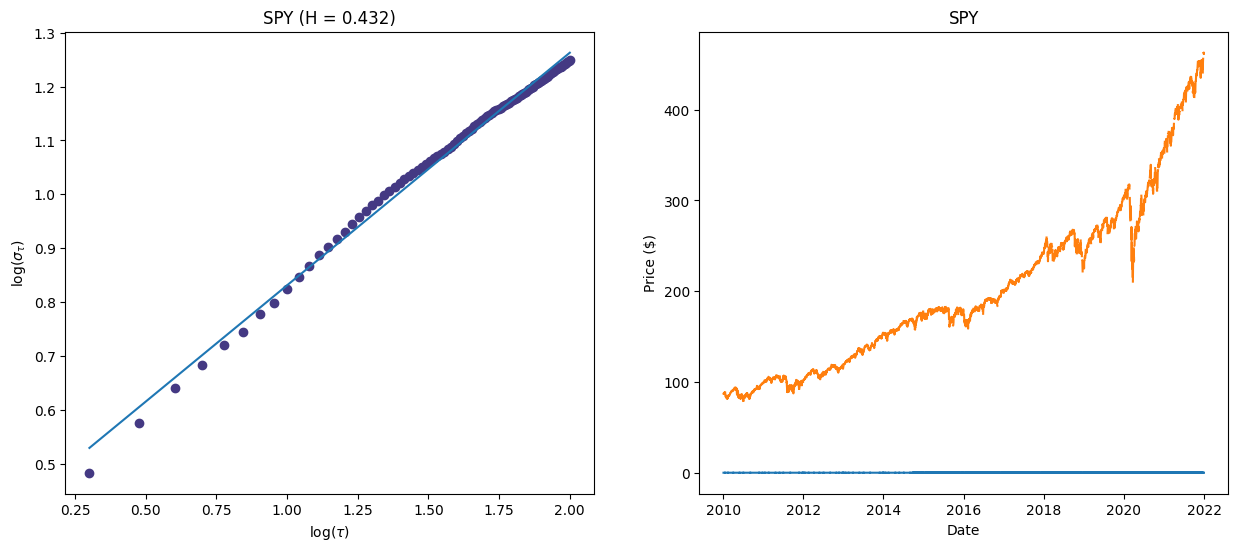

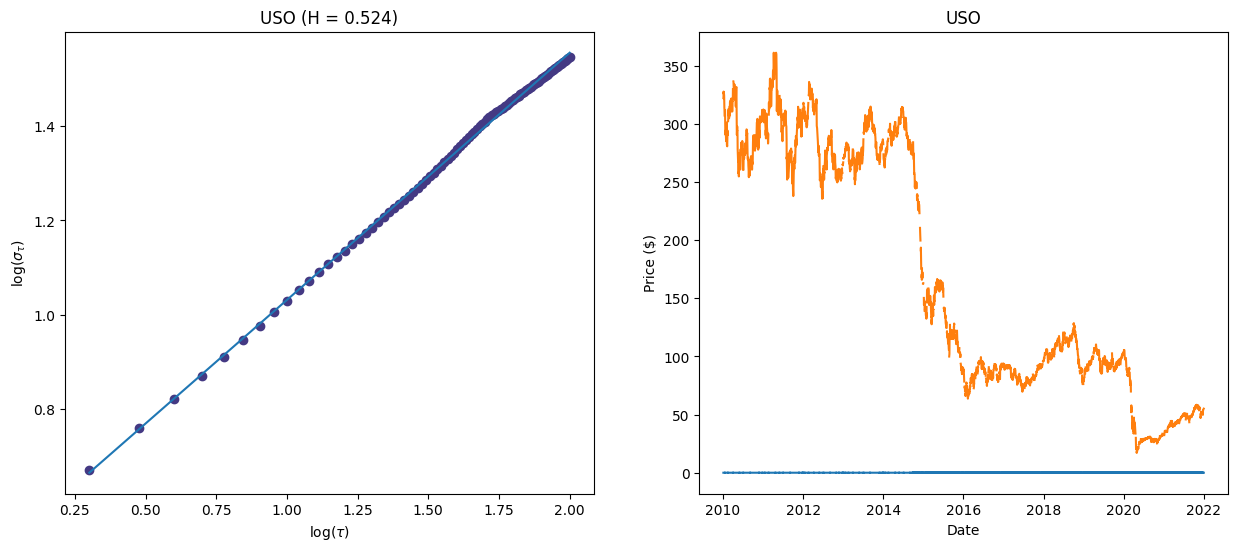

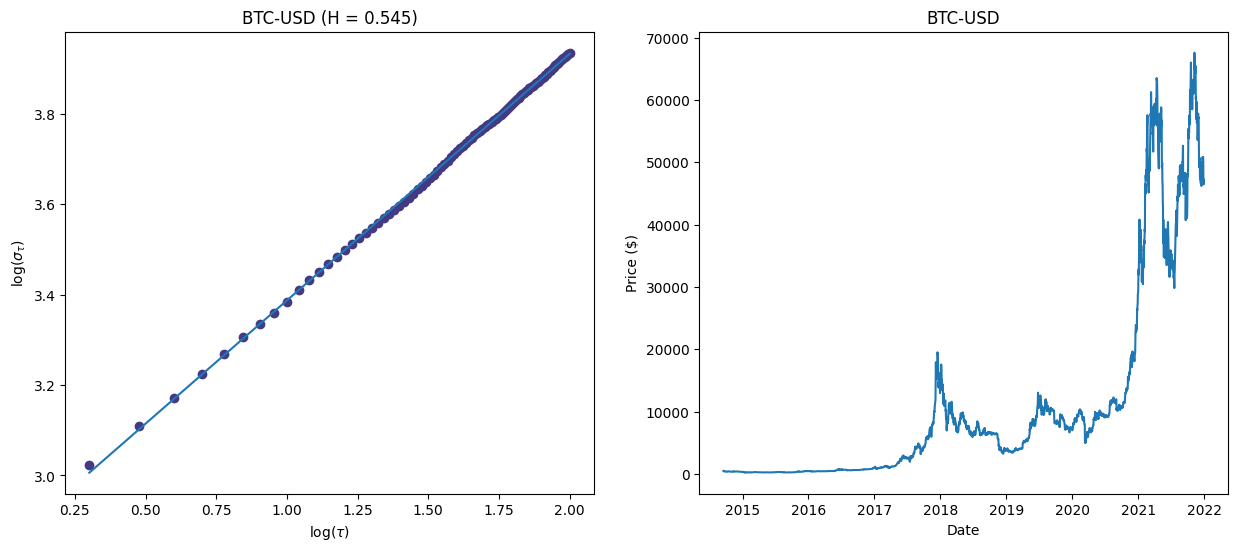

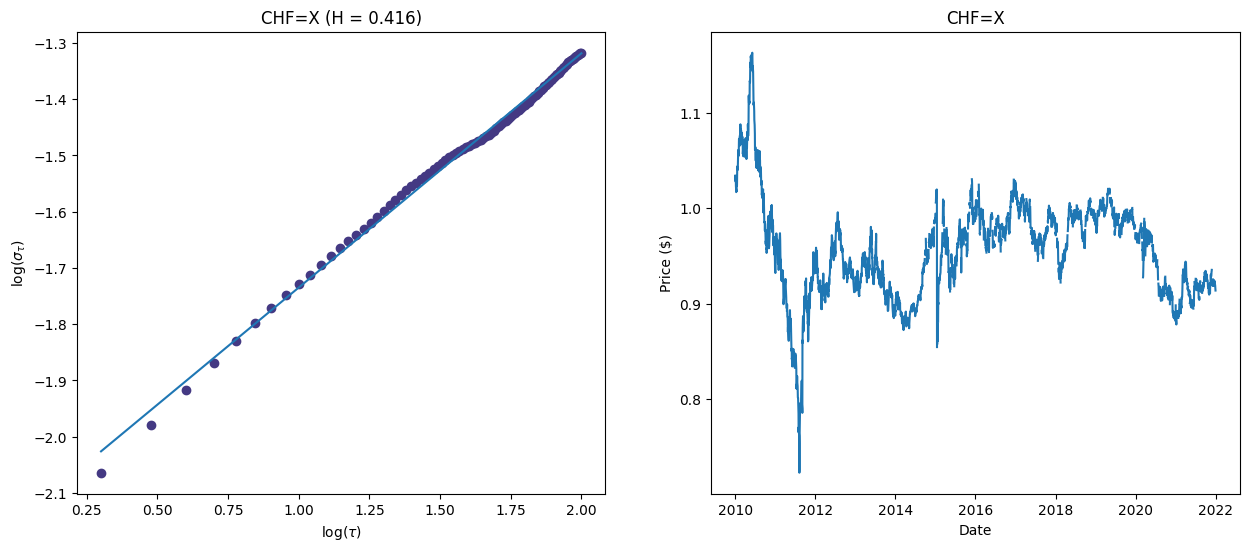

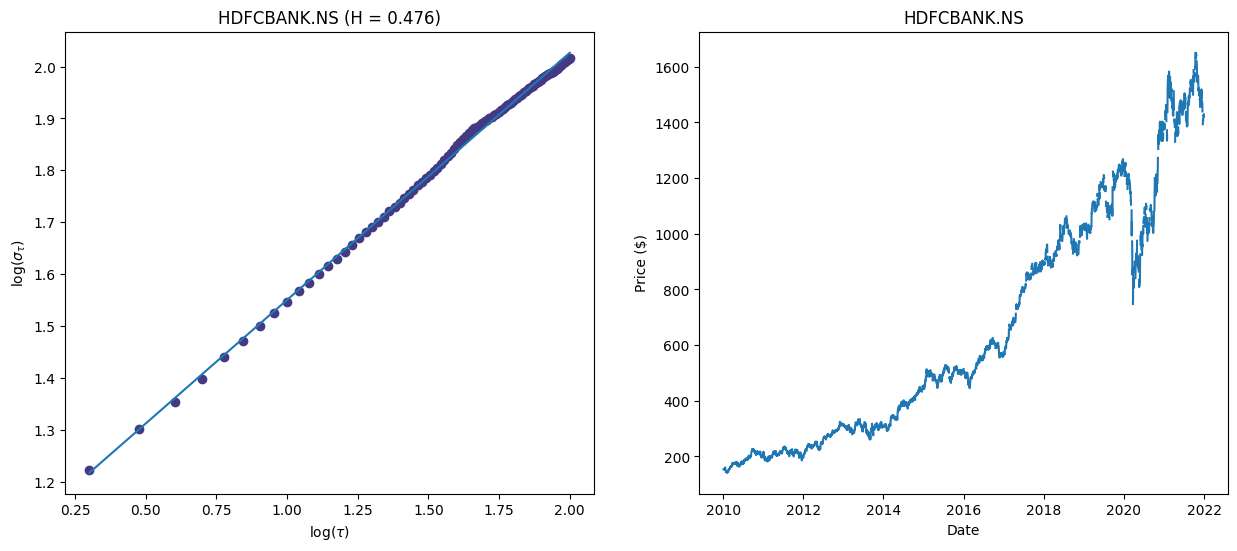

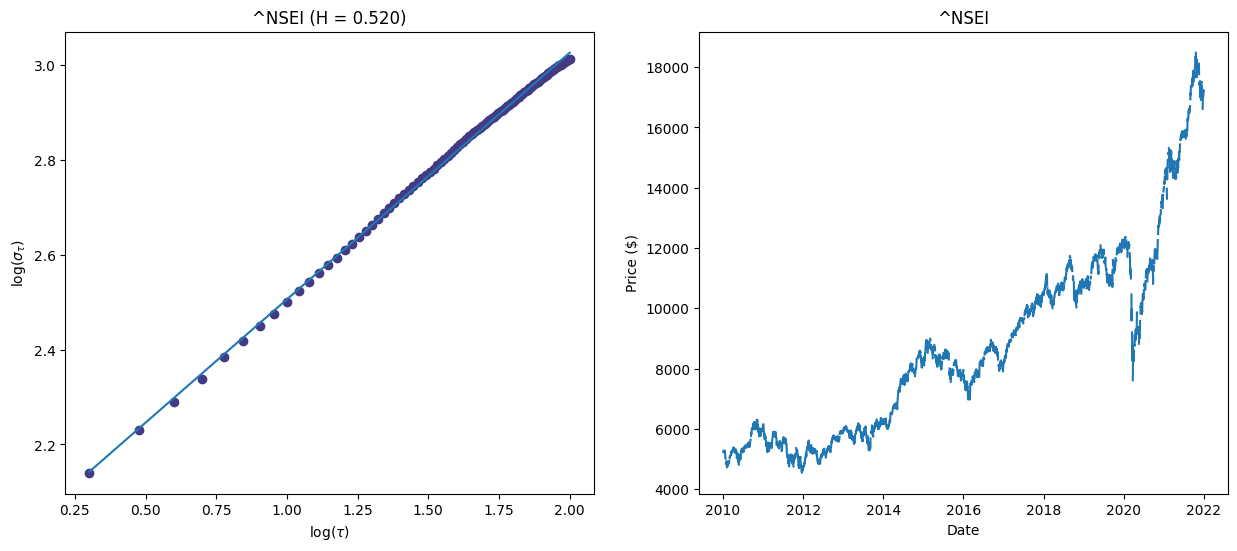

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors
colors = plt.cm.viridis(np.linspace(0, 1, len(vals)))

def plotHurst(m, x, y, series, name, colors):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    ax[0].plot(np.log10(x), m[0] * np.log10(x) + m[1]) 
    ax[0].scatter(np.log10(x), np.log10(y), c=colors[1])  # Use colors[1] or choose the appropriate color index
    ax[0].set_title(f"{name} (H = {m[0]:.3f})")
    ax[0].set_xlabel(r"log($\tau$)")
    ax[0].set_ylabel(r"log($\sigma_\tau$)")

    ax[1].plot(series)
    ax[1].set_title(f"{name}")
    ax[1].set_ylabel("Price ($)")
    ax[1].set_xlabel("Date")

    return fig, ax

# Assuming vals is a dictionary and df is a DataFrame
for k, v in vals.items():
    fig, ax = plotHurst(*v, df[k], k, colors)
    plt.show()


Where:

- Z is the Z-Score.
- X is the value of the data point.
- μ is the mean of the data.
- σ is the standard deviation.


By analyzing stock prices through the lens of Z-Scores, traders can identify potential buy/sell opportunities. A Z-Score significantly higher than 1.5 might indicate that the stock is overpriced compared to its historical average, whereas a Z-Score significantly lower than -1.5 might indicate the opposite.

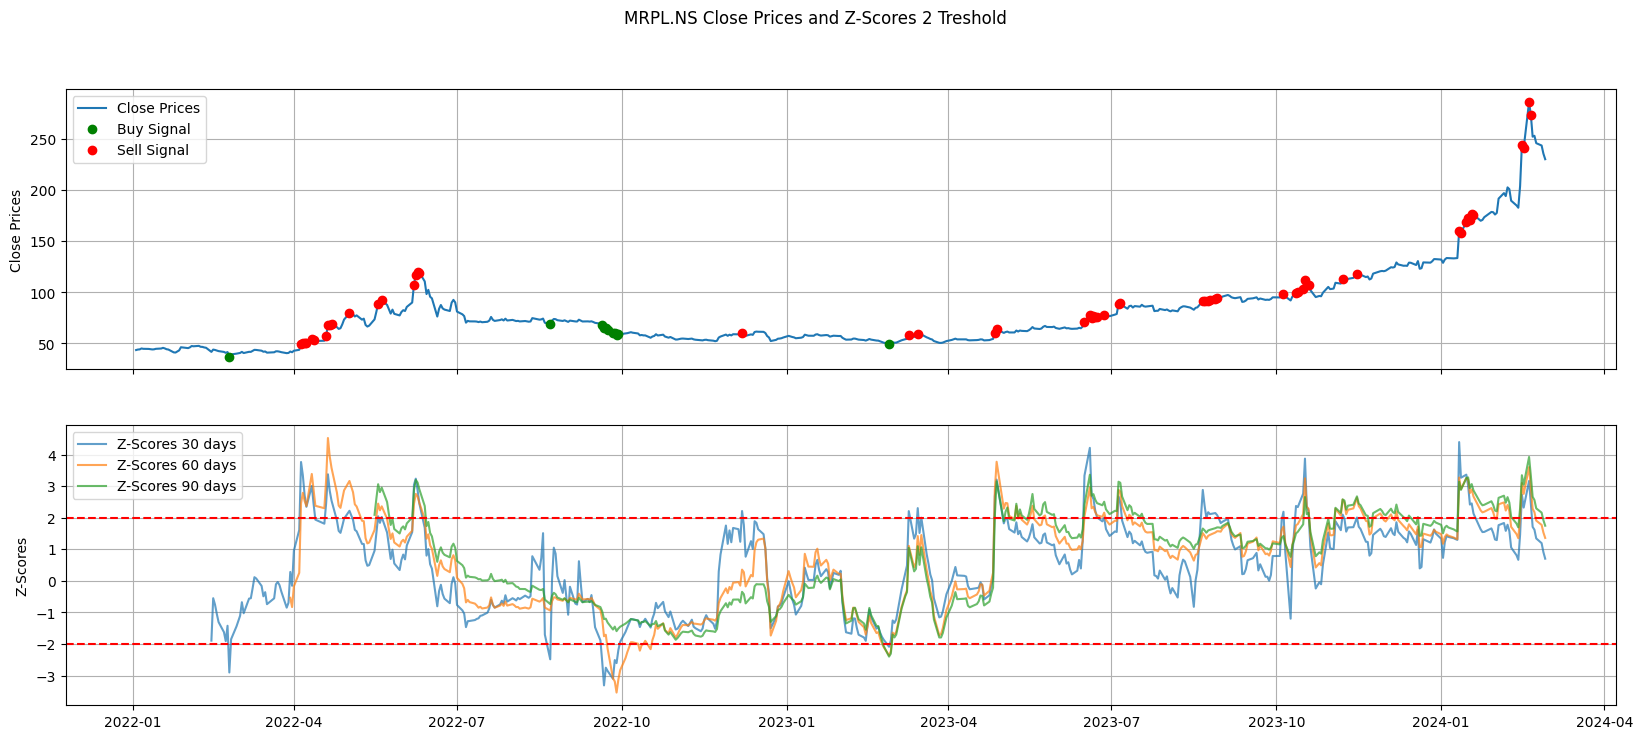